# Sentiment-based Product Recommendation System


## Following tasks will be performed:

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3.  Improving the recommendations using the sentiment analysis model
4.  Deploying the end-to-end project with a user interface

# Data sourcing and sentiment analysis
## In Sentiment Analysis, below steps need to be performed:

Following eight major steps will be performed

1.  Data Sourcing/loading

2. Text preprocessing/Data cleaning

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Model building using supervised learning

6. Model training and evaluation

7. Model inference



## Import the required libraries. 


In [1]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
%matplotlib inline

from scipy import stats
from scipy.interpolate import interp1d
from scipy.signal import correlate

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter

import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
#from scipy.signal._signaltools import _centered
from scipy.signal.signaltools import _centered
# Libraries for model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from statsmodels.compat.numpy import lstsq

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None 



In [2]:
df_review = pd.read_csv('sample30.csv')
print('Shape of dataset- ',df_review.shape)
df_review.head(5)

Shape of dataset-  (30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


<font color=blue>
    
#### Understand different columns and datatypes in dataframe
    
</font>

In [3]:
#print the information of dataframe to check their data types.
df_review.info()
print(df_review.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [4]:
#print the shape of the Dataframe
df_review.shape

(30000, 15)

In [5]:
#describe the data frame
df_review.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# <span style ='background:skyblue'> Step 2: Data Cleaning.
    
### Step 2.1 Fixing the Rows and Columns. 
</span>

<font color=blue> 
    
#### Checking and fixing columns with NaN values
</font>

In [6]:
# Find missing values/ % of null values percentage in the data set
null_values_per_column = (100*round((df_review.isnull().sum())/len(df_review),2)).sort_values(ascending=False)
print("% of null values per column:")
print(null_values_per_column)

% of null values per column:
reviews_userProvince    99.0
reviews_userCity        94.0
reviews_didPurchase     47.0
reviews_doRecommend      9.0
reviews_title            1.0
user_sentiment           0.0
reviews_username         0.0
reviews_text             0.0
reviews_rating           0.0
reviews_date             0.0
name                     0.0
manufacturer             0.0
categories               0.0
brand                    0.0
id                       0.0
dtype: float64


    
####  Here we see reviews_userProvince and reviews_userCity has ,more than 90% missing values and is not useful for our analysis, so removing these two columns. We also dont need reviews_doRecommend column. Lets drop it as well


In [7]:
df_review = df_review.drop('reviews_userProvince',axis=1)
df_review = df_review.drop('reviews_userCity',axis=1)
df_review = df_review.drop('reviews_doRecommend',axis=1)

#### We will also drop reviews_didPurchase as it has half of the values as null

In [8]:
df_review = df_review.drop('reviews_didPurchase',axis=1)

#### Create a new columns 'reviews' by merging the reviews_text and reviews_title columns

In [9]:
#create a new columns 'reviews' by merging the reviews_text and reviews_title columns
df_review['reviews'] = df_review['reviews_title']+ " "+df_review['reviews_text']


In [10]:
#Drop the existing reviews_text  column
df_review.drop(['reviews_text'], axis =1 ,inplace = True)

In [11]:
df_review.duplicated().sum()

19

In [12]:
df_review = df_review.drop_duplicates()

In [13]:
df_review.duplicated().sum()

0

In [14]:
#Create a clean dataframe
df_clean_review = df_review[['name','reviews_username','reviews_rating','user_sentiment','reviews']]

In [15]:
df_clean_review.head()

,name,reviews_username,reviews_rating,user_sentiment,reviews
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Positive,Good Good flavor. This review was collected as part of a promotion.
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Positive,Good Good flavor.
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,Negative,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess."
4,K-Y Love Sensuality Pleasure Gel,walker557,1,Negative,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


In [16]:
#ccheck the columns, non-null count, datatype of each column
df_clean_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29981 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29981 non-null  object
 1   reviews_username  29918 non-null  object
 2   reviews_rating    29981 non-null  int64 
 3   user_sentiment    29980 non-null  object
 4   reviews           29795 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
df_clean_review.shape

(29981, 5)

In [18]:
#describe the data frame
df_clean_review.describe()

,reviews_rating
count,29981.000000
mean,4.482906
std,0.988636
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
# Find missing values/ % of null values percentage in the data set
null_values_per_column = (100*round((df_clean_review.isnull().sum())/len(df_review),2)).sort_values(ascending=False)
print("% of null values per column:")
print(null_values_per_column)

% of null values per column:
reviews             1.0
user_sentiment      0.0
reviews_rating      0.0
reviews_username    0.0
name                0.0
dtype: float64


In [20]:
df_clean_review.dropna(inplace= True)

In [21]:
#map postivie sentiment as '1' and negative sentiment as '0'
df_clean_review['user_sentiment']=df_clean_review['user_sentiment'].replace({'Positive' :1, "Negative" : 0})

In [22]:
#Typecasting from float to int datatype
df_clean_review ['user_sentiment'] = df_clean_review['user_sentiment'].astype('int64')

In [23]:
df_clean_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29732 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29732 non-null  object
 1   reviews_username  29732 non-null  object
 2   reviews_rating    29732 non-null  int64 
 3   user_sentiment    29732 non-null  int64 
 4   reviews           29732 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


#### Get the count of each ratings

In [24]:
df_clean_review.reviews_rating.value_counts()

5    20639
4     5991
1     1361
3     1332
2      409
Name: reviews_rating, dtype: int64

In [25]:
df_clean_review.isna().sum()

name                0
reviews_username    0
reviews_rating      0
user_sentiment      0
reviews             0
dtype: int64

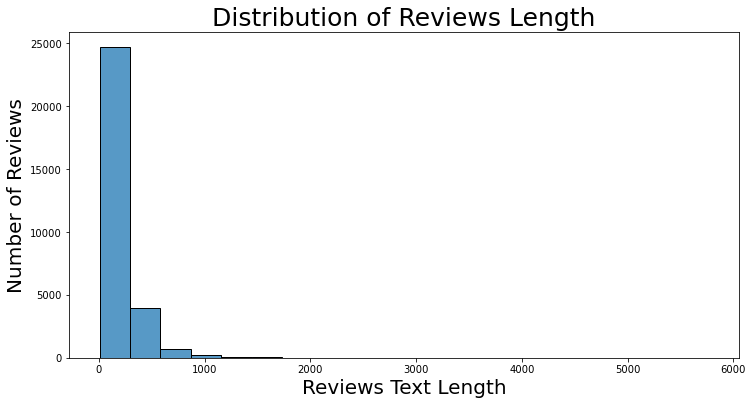

In [26]:
#Grapsh for the review_ratings Vs Length of the processed_reviews
import seaborn as sns
text_len = [len(text) for text in df_clean_review['reviews']]

plt.figure(figsize=[12,6])
sns.histplot(data=text_len,bins=20)
plt.title('Distribution of Reviews Length', fontsize = 25)
plt.xlabel('Reviews Text Length', size = 20)
plt.ylabel('Number of Reviews',size=20)
plt.show()

## Text Processing



* Remove Stopwords
* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing number


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.

In [27]:
#Common functions for cleaning the text data 
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [29]:
# Add a column for lemmatized review to the dataframe
df_clean_review["final_review"] =  df_clean_review.apply(lambda x: normalize_and_lemmaize(x['reviews']), axis=1)
#final_review = lemmatized review

In [30]:
df_clean_review.head()

,name,reviews_username,reviews_rating,user_sentiment,reviews,final_review
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,1,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,1,Good Good flavor. This review was collected as part of a promotion.,good good flavor review collect part promotion
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,1,Good Good flavor.,good good flavor
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,0,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappoint read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,K-Y Love Sensuality Pleasure Gel,walker557,1,0,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,irritation husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


### Class Imbalance Handling Using SMOTE

In [31]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [32]:
# Train and Test Divide
x_train,x_test,y_train,y_test = train_test_split(df_clean_review['final_review'],df_clean_review['user_sentiment'],train_size=0.75,random_state=45,stratify=df_clean_review['user_sentiment'])
y_train.value_counts()


1    19798
0     2501
Name: user_sentiment, dtype: int64

### Feature Extraction - TD-IDF


In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)


tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape

(22299, 15349)

In [34]:
# #creating the pickle for countvectorizer and TFIDF Transformer
import pickle
pickle.dump(count_vect,open("./Pickle/count_vector.pkl","wb"))
pickle.dump(tfidf_transformer,open("./Pickle/tfidf_transformer.pkl","wb"))

In [35]:
count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 19798, 0: 2501})
After sampling : Counter({1: 19798, 0: 19798})


### Model Building
I will try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* XGBooost
* Naive Bayes

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [36]:
# Function for Metrics
performance=[]

def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)
  precision = precision_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  TP = confusion[1,1]  # true positive
  TN = confusion[0,0]  # true negatives
  FP = confusion[0,1]  # false positives
  FN = confusion[1,0]  # false negatives
  sensitivity= TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':precision,
                       'F1_score':f1}))
  return metrics



## Logistic Regression

In [37]:
# 1. Logsitic Regression 
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train_sm,y_train_sm)


LogisticRegression(solver='liblinear')

In [38]:
y_pred = lr.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

**************************************************
Confusion Matrix =
[[19040   758]
 [ 2016 17782]]
sensitivity of the Logistic Regression = 0.900000
specificity of the Logistic Regression = 0.960000
Accuracy Score of Logistic Regression = 0.929942
ROC AUC score of Logistic Regression = 0.929942
Report=
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     19798
           1       0.96      0.90      0.93     19798

    accuracy                           0.93     39596
   macro avg       0.93      0.93      0.93     39596
weighted avg       0.93      0.93      0.93     39596

**************************************************


In [39]:
# import pickle
# pickle.dump(lr,open("./Pickle/LogisticRegression.pkl","wb"))

## RandomForest Classifier

In [40]:
# 2. RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [41]:
y_pred_rf = rf.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'RandomForestClassifier',performance)

**************************************************
Confusion Matrix =
[[19798     0]
 [    2 19796]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999949
ROC AUC score of RandomForestClassifier = 0.999949
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19798
           1       1.00      1.00      1.00     19798

    accuracy                           1.00     39596
   macro avg       1.00      1.00      1.00     39596
weighted avg       1.00      1.00      1.00     39596

**************************************************


## Gradient Boost_AdaBoost Classifier

In [42]:
xgba = GradientBoostingClassifier()
xgba.fit(x_train_sm,y_train_sm)
y_pred_xgb = xgba.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_rf,'AdaBoostclassifier',peformance)

**************************************************
Confusion Matrix =
[[19798     0]
 [    2 19796]]
sensitivity of the AdaBoostclassifier = 1.000000
specificity of the AdaBoostclassifier = 1.000000
Accuracy Score of AdaBoostclassifier = 0.999949
ROC AUC score of AdaBoostclassifier = 0.999949
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19798
           1       1.00      1.00      1.00     19798

    accuracy                           1.00     39596
   macro avg       1.00      1.00      1.00     39596
weighted avg       1.00      1.00      1.00     39596

**************************************************


## XGBoost

In [43]:
import xgboost as xgb

In [44]:
#4.XGBoostClassifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',peformance)

**************************************************
Confusion Matrix =
[[18841   957]
 [  940 18858]]
sensitivity of the XGBClassifier = 0.950000
specificity of the XGBClassifier = 0.950000
Accuracy Score of XGBClassifier = 0.952091
ROC AUC score of XGBClassifier = 0.952091
Report=
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19798
           1       0.95      0.95      0.95     19798

    accuracy                           0.95     39596
   macro avg       0.95      0.95      0.95     39596
weighted avg       0.95      0.95      0.95     39596

**************************************************


## Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [46]:
# #5.Naive Bayes /ACTUAL CODE/
# #from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# nb_classifier = MultinomialNB()
# nb_classifier.fit(x_train_sm,y_train_sm)
# y_pred_nbc = nb_classifier.predict(x_train_sm)
# peformance = model_metrics(y_train_sm,y_pred_nbc,'NBClassifier_MultinomialNB',peformance)

In [47]:
#5.Naive Bayes
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb_classifier = MultinomialNB()
nb_classifier_model=nb_classifier.fit(x_train_sm,y_train_sm)
y_pred_nbc = nb_classifier_model.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_nbc,'NBClassifier_MultinomialNB',peformance)

**************************************************
Confusion Matrix =
[[17584  2214]
 [ 2612 17186]]
sensitivity of the NBClassifier_MultinomialNB = 0.870000
specificity of the NBClassifier_MultinomialNB = 0.890000
Accuracy Score of NBClassifier_MultinomialNB = 0.878119
ROC AUC score of NBClassifier_MultinomialNB = 0.878119
Report=
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     19798
           1       0.89      0.87      0.88     19798

    accuracy                           0.88     39596
   macro avg       0.88      0.88      0.88     39596
weighted avg       0.88      0.88      0.88     39596

**************************************************


In [48]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.929942,0.929942,0.959115,0.927644
1,RandomForestClassifier,0.999949,0.999949,1.000000,0.999949
2,AdaBoostclassifier,0.999949,0.999949,1.000000,0.999949
3,XGBClassifier,0.952091,0.952091,0.951703,0.952112
4,NBClassifier_MultinomialNB,0.878119,0.878119,0.885876,0.876881


## Hyperparameter Tuning of models 
Perform Tuning of atleast 2 models and then choose best model

### Logistic Regression_HyperParameter Tuning

In [49]:
#Evaluation between lr , rf and boost 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

**************************************************
Confusion Matrix =
[[ 638  196]
 [ 787 5812]]
sensitivity of the Logistic Regression = 0.880000
specificity of the Logistic Regression = 0.760000
Accuracy Score of Logistic Regression = 0.867752
ROC AUC score of Logistic Regression = 0.822864
Report=
              precision    recall  f1-score   support

           0       0.45      0.76      0.56       834
           1       0.97      0.88      0.92      6599

    accuracy                           0.87      7433
   macro avg       0.71      0.82      0.74      7433
weighted avg       0.91      0.87      0.88      7433

**************************************************


In [50]:
lr_tuned = LogisticRegression()

In [51]:
# Hyperparameter tuning for best result
param_nb = {'class_weight':['balanced'],'penalty' : ['l1','l2'],'C':[1,5,10], }

grid_nb = GridSearchCV(estimator=lr_tuned, 
                       param_grid=param_nb,
                       verbose=1,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=4)
grid_nb.fit(x_train_sm, y_train_sm)
#print(grid_nb.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [52]:
# Creating model with best hyperparameter
lr_tuned_model=grid_nb.fit(x_train_sm,y_train_sm)
y_pred_lr_tuned = lr_tuned_model.predict(test_tfidf_vect)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


In [53]:
#Evaluation between lr , rf and boost 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr_tuned_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_pred_lr_tuned,'LogisticRegression_Classifier',test_performance)

**************************************************
Confusion Matrix =
[[ 579  255]
 [ 643 5956]]
sensitivity of the LogisticRegression_Classifier = 0.900000
specificity of the LogisticRegression_Classifier = 0.690000
Accuracy Score of LogisticRegression_Classifier = 0.879187
ROC AUC score of LogisticRegression_Classifier = 0.798403
Report=
              precision    recall  f1-score   support

           0       0.47      0.69      0.56       834
           1       0.96      0.90      0.93      6599

    accuracy                           0.88      7433
   macro avg       0.72      0.80      0.75      7433
weighted avg       0.90      0.88      0.89      7433

**************************************************


###  XGBoost _HyperParameter Tuning

In [54]:
n_estimators = [200,400,600]
params_1 = {'n_estimators':n_estimators} 

In [55]:
grid_cv_boost = GridSearchCV(estimator=xgba,
                       param_grid=params_1,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [56]:
grid_cv_boost.fit(x_train_sm,y_train_sm)
print('Best score for GradientBoosting=',grid_cv_boost.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9714552303938809


In [57]:
xgb_final=grid_cv_boost.best_estimator_
xgb_final

GradientBoostingClassifier(n_estimators=600)

In [58]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbgcv,'GradientBoostClassifier with n = 600',peformance)

**************************************************
Confusion Matrix =
[[18948   850]
 [ 1633 18165]]
sensitivity of the GradientBoostClassifier with n = 600 = 0.920000
specificity of the GradientBoostClassifier with n = 600 = 0.960000
Accuracy Score of GradientBoostClassifier with n = 600 = 0.937292
ROC AUC score of GradientBoostClassifier with n = 600 = 0.937292
Report=
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     19798
           1       0.96      0.92      0.94     19798

    accuracy                           0.94     39596
   macro avg       0.94      0.94      0.94     39596
weighted avg       0.94      0.94      0.94     39596

**************************************************


In [59]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.929942,0.929942,0.959115,0.927644
1,RandomForestClassifier,0.999949,0.999949,1.000000,0.999949
2,AdaBoostclassifier,0.999949,0.999949,1.000000,0.999949
3,XGBClassifier,0.952091,0.952091,0.951703,0.952112
4,NBClassifier_MultinomialNB,0.878119,0.878119,0.885876,0.876881
5,GradientBoostClassifier with n = 600,0.937292,0.937292,0.955298,0.936027


In [60]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

In [61]:
final_model.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

## Evaluation between LR,RF,NB, XGboost 

In [62]:
#Evaluation between lr , rf and boost 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

y_test_pred_lr = lr_tuned_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_pred_lr_tuned,'Tuned LogisticRegression',test_performance)

y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgbc,'XGBoost Classifier',test_performance)

y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgb,'Tuned XGBoostClassifier',test_performance)

y_test_pred_nbc = final_model.predict(test_tfidf_vect)
peformance = model_metrics(y_train_sm,y_pred_nbc,'NBClassifier_MultinomialNB',test_peformance)


**************************************************
Confusion Matrix =
[[ 638  196]
 [ 787 5812]]
sensitivity of the Logistic Regression = 0.880000
specificity of the Logistic Regression = 0.760000
Accuracy Score of Logistic Regression = 0.867752
ROC AUC score of Logistic Regression = 0.822864
Report=
              precision    recall  f1-score   support

           0       0.45      0.76      0.56       834
           1       0.97      0.88      0.92      6599

    accuracy                           0.87      7433
   macro avg       0.71      0.82      0.74      7433
weighted avg       0.91      0.87      0.88      7433

**************************************************
**************************************************
Confusion Matrix =
[[ 579  255]
 [ 643 5956]]
sensitivity of the Tuned LogisticRegression = 0.900000
specificity of the Tuned LogisticRegression = 0.690000
Accuracy Score of Tuned LogisticRegression = 0.879187
ROC AUC score of Tuned LogisticRegression = 0.798403
Report

In [63]:
test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.867752,0.822864,0.967377,0.922027
1,Tuned LogisticRegression,0.879187,0.798403,0.958944,0.929899
2,XGBoost Classifier,0.889816,0.758822,0.947092,0.937304
3,Tuned XGBoostClassifier,0.851204,0.694129,0.933134,0.914529
4,NBClassifier_MultinomialNB,0.878119,0.878119,0.885876,0.876881


### Evaluation with test data after comparing 
- After Hyperparameter Tuning Considering roc_auc_score ,performance, Logistic Regression is having more score and have good accuracy. This will be our final model

In [65]:
# Load the final model - LR to pickle file
import pickle
pickle.dump(lr_tuned_model,open("./Pickle/model.pkl","wb"))


# 5. Recommedation system
- User and User recommedation system 
- Item and Item recommedation system 

## User and User recommedation 

### Load the data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
df = pd.read_csv('sample30.csv')


In [68]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size=0.70,random_state=45)
print('train shape = ',train.shape)
print('test shape = ',test.shape)

train shape =  (21000, 15)
test shape =  (9000, 15)


### Dividing the dataset into train and test

In [69]:
#using train dataset and create correlation matrix 
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)


In [70]:
#Creating the train and test dataset for predicting and evaluating the correlation
#fill 1 in place of Nan for prediction 
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)

In [71]:
train_pivot1.loc['joshua']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                              1.0
100:Complete First Season (blu-Ray)                                                                        1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                          1.0
2x Ultra Era with Oxi Booster, 50fl oz                                                                     1.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                              1.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                          1.0
5302050 15/16 FCT/HOSE ADAPTOR                                                                             1.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super                                                1.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo                                                         

In [72]:
# here we are going use the adjusted cosine similarity 
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity 
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity 
    user_correlation = 1- pairwise_distances (substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df
    

In [73]:
from sklearn.metrics import pairwise_distances
user_corr_matrix,normalized_df = cosine_similarity(train_pivot1)


In [74]:
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [75]:
user_corr_matrix.shape

(18205, 18205)

In [76]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [77]:
df[df['reviews_username'] == 'kimmi']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2700,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-08-05T00:00:00.000Z,NaN,True,4,I think the first movie was better but still great movie,Funny movie,NaN,NaN,kimmi,Positive
16097,AVpf63aJLJeJML43F__Q,Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Lip Balm,Lip Gloss,Beauty,Lips,Beauty & Personal Care,Skin Care,Lip Care,Lip Balms & Treatments",Burt's Bees,"Burt's Bees Lip Shimmer, Raisin",2009-08-28T00:00:00.000Z,False,True,5,This is perfect for everyday. Keeps my lips soft and adds enough color to make me look my best. I wear it to work where we are office casual dress.,Really Nice,NaN,NaN,kimmi,Positive


In [154]:
user_pred_ratings = np.dot(user_corr_matrix,train_pivot1.fillna(0))
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [155]:
user_pred_ratings.shape

(18205, 254)

In [156]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)


In [157]:
user_final_rating.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher D

### Loading User-User Recommendation System in Pickle file user_final_rating.pkl

In [158]:
# Creating a pickle file for user-user recommendation system
import pickle 
pickle.dump(user_final_rating,open('./Pickle/user_final_rating.pkl','wb'))

### Top20 Product Recommendations

In [159]:
d = user_final_rating
d.loc['joshua'].sort_values(ascending=False)[:20]

name
Red (special Edition) (dvdvideo)                                                          3448.574777
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                        1515.983128
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    1163.172297
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 1163.172297
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                             1055.651201
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                            250.881688
Mike Dave Need Wedding Dates (dvd + Digital)                                               238.989341
The Resident Evil Collection 5 Discs (blu-Ray)                                             237.147662
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                        236.272889
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                         

### Evaluation for user-user recommendation system

In [160]:
## Evaluation
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2006, 15)

In [161]:
corr_df = pd.DataFrame(user_corr_matrix)

In [162]:
#corr_df.head

In [163]:
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)


In [164]:
#corr_df

In [165]:
list_name = common.reviews_username.tolist()

In [166]:
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [167]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [168]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
#corr_df3.head()

In [169]:
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)

In [170]:
#common_user_tb

In [171]:
corr_df3[corr_df3<0] = 0
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
#common_user_rating

In [172]:
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
#dummy_test

In [175]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)


In [176]:
#common_user_pred_ratings

In [177]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [178]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [179]:
total_non_nan

1787

In [180]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)


In [181]:
#common_pivot

### Calculate RMSE

In [182]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.875589018465046


## Item and Item recommendation system

In [183]:
train_pivot_ii = train_pivot1.T


In [185]:
#train_pivot_ii

In [186]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [187]:
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0


In [188]:
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [189]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)


In [191]:
#item_final_rating

In [192]:
d_item = item_final_rating
d_item.loc['joshua'].sort_values(ascending=False)[:20]

name
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 55.168822
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    55.168822
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                        33.465287
Red (special Edition) (dvdvideo)                                                          13.700189
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                              8.680251
Cantu Coconut Milk Shine Hold Mist - 8oz                                                   2.310821
Newman's Own Organics Licorice Twist, Black 5oz                                            2.293461
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                            2.254708
Naturtint Nutrideep Multiplier Protective Cream                                            2.245405
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                                   2.10

In [197]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()


In [198]:
dummy_train.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
15221,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Binders and Accessories,All Binders,School & Office Supplies,Filing,File Dividers,Dividers",Avery Dennison,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",2009-10-08T00:00:00.000Z,False,True,5,"These worked great for an ongoing project of mine. It was easy to set up the with the template and print out, looked very professional when complete. I can now add information to the binder for my project.",Great Product,NaN,NaN,dpat,Positive
21212,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Featured Brands,Health & Beauty,Unilever,Ways To Shop",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-09-04T00:00:00.000Z,False,False,1,"I've been using this gel for as long as I can remember and unfortunately have bought my last tube - the new formula and fragrance are not good for me - what a disappointment - if it ain't broke, don't fix it!",New formula,NaN,NaN,kristink,Negative
14505,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-13T00:00:00.000Z,False,True,5,I like how the wipes cleans the surface and kills germs and smells great. This review was collected as part of a promotion.,The best cleaner!,NaN,NaN,mamaw1955,Positive
15266,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Binders and Accessories,All Binders,School & Office Supplies,Filing,File Dividers,Dividers",Avery Dennison,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",2010-02-11T00:00:00.000Z,False,True,5,these tabs are very professional looking and make the project very uniform in it's appearance. I would recommend for all documents that need a finished look!,these tabs are very ...,NaN,NaN,rademc,Positive
1413,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditioners,Beauty,Salon Hair Care",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2014-02-11T00:00:00.000Z,False,True,5,I switched to Suave Sleek Shampoo Conditioner a few months ago after using Matrix's Smooth Sleek exclusively for the last 10 years. It's been a seamless breakup with Matrix! I'm now a big fan of the Suave product that works just as well as a fraction of the price!,Just as good as Matrix,NaN,NaN,mcfarr56,Positive


## Evaluation of Item and Item

In [199]:
common_item = test[test.name.isin(train.name)]


In [200]:
#common_item

In [201]:
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T

common_item_pivot.shape

(206, 8379)

In [202]:
item_corr_df = pd.DataFrame(item_corr_matrix)
#item_corr_df

In [203]:
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
#item_corr_df

In [204]:
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
#item_corr_df

In [205]:
#list_items

In [206]:
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
#item_corr_df1

In [207]:
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T
#item_corr_df3

In [208]:
item_corr_df3[item_corr_df3<0] = 0
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [209]:
test_items = common_item.copy()


In [211]:
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)


In [213]:
#final_item_ratings

In [214]:
X  = final_item_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [215]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

## Calculate RMSE

In [216]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

3.5545409495089935


<font color=Blue> 
    
#### <u> SUMMARY:</u>  
    
1. RMSE for USER-USER is 1.87 and RMSE for ITEM-ITEM is 3.55. Lesser the RMSE better the model. Hence User-User 
recommendation system is suitable recommendataion systems for this dataset
2. User-User Recommedation is loaded into available in user_final_rating.pkl
</font>


   
   

<font color=Blue> 
    
#### <u> Notes:</u>  
    
1. Model.py: This file has the Top 20 Products and Top 5 Products recommended based on sentiment
2. Pickle files: Are avaialble in Pickle folder
3. Heroku URL : https://product-recommedation-capstone.herokuapp.com/
</font>